In [7]:
%matplotlib inline
import pandas
import matplotlib.pyplot
trains = pandas.read_csv('../../../data/sydtrains.csv', index_col=1, thousands=",")

In [8]:
trains2014 = trains[trains.YEAR == 2014]

In [12]:
interesting_cols = trains2014[['IN_0600_0930', 'OUT_0600_0930']]

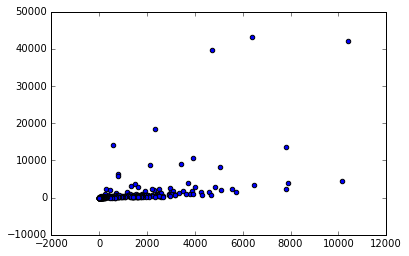

In [13]:
matplotlib.pyplot.scatter(interesting_cols.IN_0600_0930, interesting_cols.OUT_0600_0930)

In [14]:
interesting_cols[interesting_cols.IN_0600_0930 > 9000]

,IN_0600_0930,OUT_0600_0930
STATION,,
Central,10390,42070
Bondi Junction,10150,4350


In [15]:
import sklearn.cluster

In [22]:
kmeans_clusterer = sklearn.cluster.KMeans(init ='k-means++', n_clusters = 2)

In [24]:
two_clustering = kmeans_clusterer.fit_predict(interesting_cols)

In [25]:
import numpy

In [26]:
rainbow = numpy.array(['red', 'green', 'blue', 'orange', 'purple', 'teal', 'magenta', 'cyan'])

In [27]:
#indexed by two_clustering will assign the first two colours to the numbers
rainbow[two_clustering]

array(['green', 'green', 'green', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 

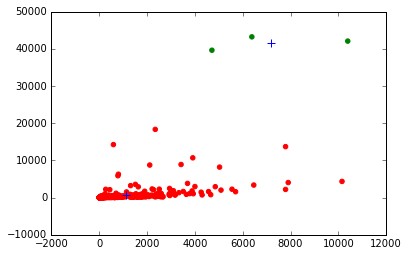

In [42]:
matplotlib.pyplot.scatter(interesting_cols.IN_0600_0930,
                         interesting_cols.OUT_0600_0930,
                         color = rainbow[two_clustering])
#overlay with centroid
matplotlib.pyplot.scatter(kmeans_clusterer.cluster_centers_[:,0],
                         kmeans_clusterer.cluster_centers_[:,1],
                         marker ="+", s=50)

In [44]:
two_cluster_centers = kmeans_clusterer.cluster_centers_

In [45]:
two_cluster_centers

array([[  1117.40983607,    732.03278689],
       [  7160.        ,  41633.33333333]])

In [47]:
cluster_centers = {}
cluster_membership = {}
#compute kmeans for 3 - 15 centroids
for cluster_count in range (3,15):
    km = sklearn.cluster.KMeans(init = 'k-means++', 
                                n_clusters = cluster_count)
    cluster_membership[cluster_count] = km.fit_predict(interesting_cols)
    cluster_centers[cluster_count] = km.cluster_centers_

In [48]:
cluster_centers

{3: array([[   988.15699659,    397.6109215 ],
        [  7160.        ,  41633.33333333],
        [  4273.33333333,   8897.5       ]]),
 4: array([[   557.88617886,    198.37398374],
        [  7160.        ,  41633.33333333],
        [  3598.57142857,  11832.85714286],
        [  3430.38461538,   1762.30769231]]),
 5: array([[  5523.33333333,   2394.        ],
        [   257.38219895,    128.84816754],
        [  7160.        ,  41633.33333333],
        [  3248.75      ,  11140.        ],
        [  2008.9010989 ,    809.12087912]]),
 6: array([[  2022.55555556,    752.77777778],
        [  7160.        ,  41633.33333333],
        [   257.38219895,    128.84816754],
        [  3573.33333333,  15430.        ],
        [  5523.33333333,   2394.        ],
        [  2675.        ,   8118.33333333]]),
 7: array([[   235.75268817,    123.17204301],
        [  7160.        ,  41633.33333333],
        [  2675.        ,   8118.33333333],
        [  3107.09677419,   1663.87096774],
        [

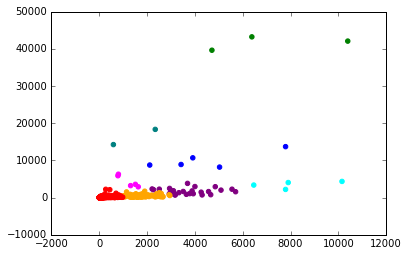

In [50]:
#plot the graph with 8 centroids
matplotlib.pyplot.scatter(interesting_cols.IN_0600_0930,
                         interesting_cols.OUT_0600_0930,
                         color = rainbow[cluster_membership[8]])

In [55]:
#put the colours back in the dataframe to check
#didn't work: trains2014['eighth_cluster_membership'] = rainbow[cluster_membership[8]]
#need to make a copied version first:
trains2014 = trains[trains.YEAR == 2014].copy()
trains2014['eighth_cluster_membership'] = rainbow[cluster_membership[8]]
trains2014.eighth_cluster_membership

STATION
Central                       green
Town Hall                     green
Wynyard                       green
Parramatta                     blue
North Sydney                   teal
Redfern                        blue
Chatswood                      blue
Bondi Junction                 cyan
Strathfield                    cyan
Circular Quay                  blue
Martin Place                   teal
Hurstville                     cyan
St Leonards                    blue
Blacktown                      cyan
Burwood                      purple
Kings Cross                  purple
Hornsby                      purple
Ashfield                     purple
Kogarah                      purple
Lidcombe                     purple
Auburn                       purple
Museum                      magenta
Epping                       purple
Macquarie University        magenta
St James                    magenta
Rockdale                     purple
Cabramatta                   purple
Bankstown           

In [56]:
import sklearn.metrics

In [57]:
two_cluster_silhouette_score = sklearn.metrics.silhouette_score(interesting_cols,
                                                               two_clustering)

In [58]:
two_cluster_silhouette_score

0.9457809055255304

In [62]:
s = {}
for cluster_count in range (3, 15):
    s[cluster_count] = sklearn.metrics.silhouette_score(interesting_cols, cluster_membership[cluster_count])
    print cluster_count, s[cluster_count]

3 0.824303583537
4 0.665944102122
5 0.615209241345
6 0.622049677055
7 0.614332276201
8 0.626679789548
9 0.630553211589
10 0.604503857161
11 0.563621549529
12 0.599310468444
13 0.605334185911
14 0.574591853289


In [63]:
s[2] = two_cluster_silhouette_score

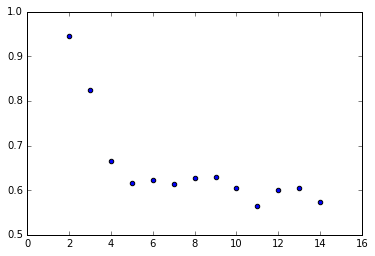

In [65]:
matplotlib.pyplot.scatter(s.keys(), s.values())